<img src="Imagenes/unal.png" align=left width="150" height="150"></img>

$\;$

---
<h2 align="center">ACP Cafe Colombiano</h2>

Este es un experimento referente a **tazas de cafe Colombiano** donde se preparan tazas de café para detectar la infuencia de la contaminación del grano con maíz y cebada. El experimento considera tres factores: agregado (sin o excelso, maíz, cebada), porcentaje del agregado (20% y 40 %) y grado de tostación (clara y oscura). Entonces el experimento consta de 10 tratamientos y con el café molido, de cada uno de ellos, se preparan tazas de café para medir propiedades químicas, físicas y sensoriales.

En este ejemplo se utilizan solamente las variables físicas: color, DA: densidad aparente, EA: extracto acuoso (contenido de sóilidos solubles) y las 10 primeras las que corresponden a los tratamientos del experimento.

#### Objetivo:
* Generar un análisis de componentes principales identificando planos factoriales y contribuciones. 

In [2]:
library(FactoClass)
data( cafe )
Y <- cafe[1:10 ,1:3];Y

,Color,DA,EA
ExCl,298,385.1,25
C40M,361,481.3,41
C40C,321,422.6,40
C20M,335,444.3,33
C20C,314,368.7,32
ExOs,186,346.6,28
O40M,278,422.6,43
O40C,238,403.0,42
O20M,226,368.7,36
O20C,210,368.7,35


### Centro de gravedad

[1] 10

Color     DA     EA 
276.70 401.16  35.50

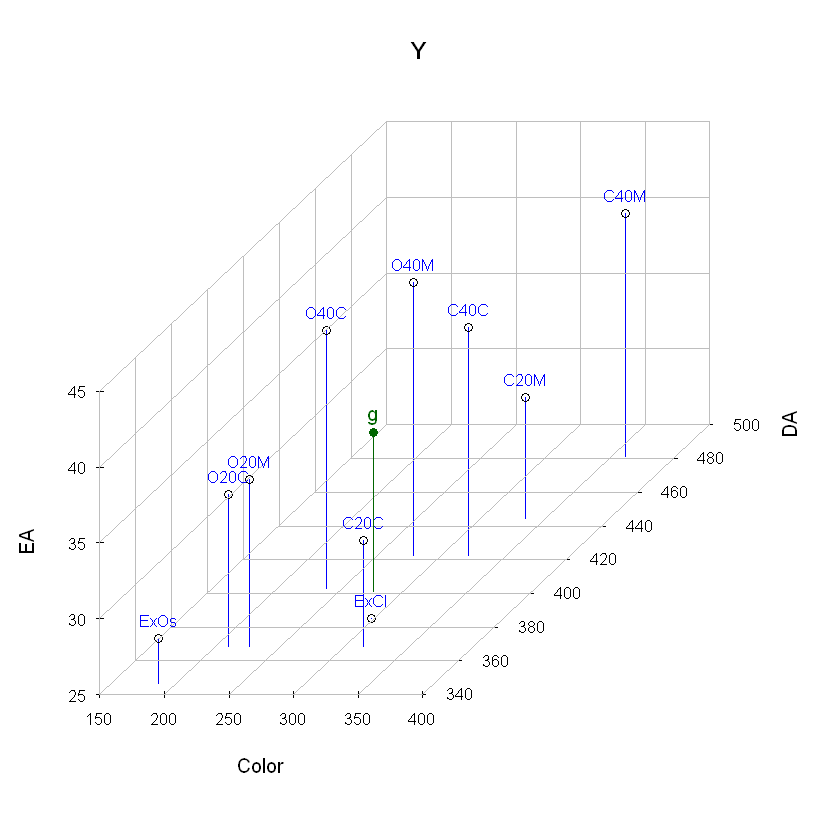

In [15]:
# grafica con el centro de gravedad
par(las =1)
Y3D <- scatterplot3d(Y, main ="Y",type ="h",color =" blue ",box =FALSE ,las =1)

# grafica
Y3D $ points3d (Y,pch =1)
addgrids3d (Y, grid = c("xy","xz","yz"))
cord2d <-Y3D $xyz.convert(Y) # convertir cordenadas 3D a 2D
text( cord2d , labels = rownames (Y), cex =0.8 , col=" blue ",pos =3) # poner etiquetas

# Centro de gravedad
n <-nrow (Y);n


g <-(1/n)* rowSums (t(Y));g # igual a colMeans (Y)


# para incluir g en la grafica
Y3D$points3d(t(g),pch =19 , col =" darkgreen ",type = "h")
text( Y3D$xyz.convert(t(g)),labels ="g",pos =3, col=" darkgreen ")

In [9]:
# xtable (Y, digits =c(0 ,0 ,1 ,0))  # para tabular en LaTeX

### Centrando la nuve de puntos 

In [11]:
par(las =1)
unos <-rep(1,n)           # vector de n unos
Yc<- Y-unos%*%t(g);Yc     # Matriz centrada (moño)

,Color,DA,EA
ExCl,21.3,-16.06,-10.5
C40M,84.3,80.14,5.5
C40C,44.3,21.44,4.5
C20M,58.3,43.14,-2.5
C20C,37.3,-32.46,-3.5
ExOs,-90.7,-54.56,-7.5
O40M,1.3,21.44,7.5
O40C,-38.7,1.84,6.5
O20M,-50.7,-32.46,0.5
O20C,-66.7,-32.46,-0.5


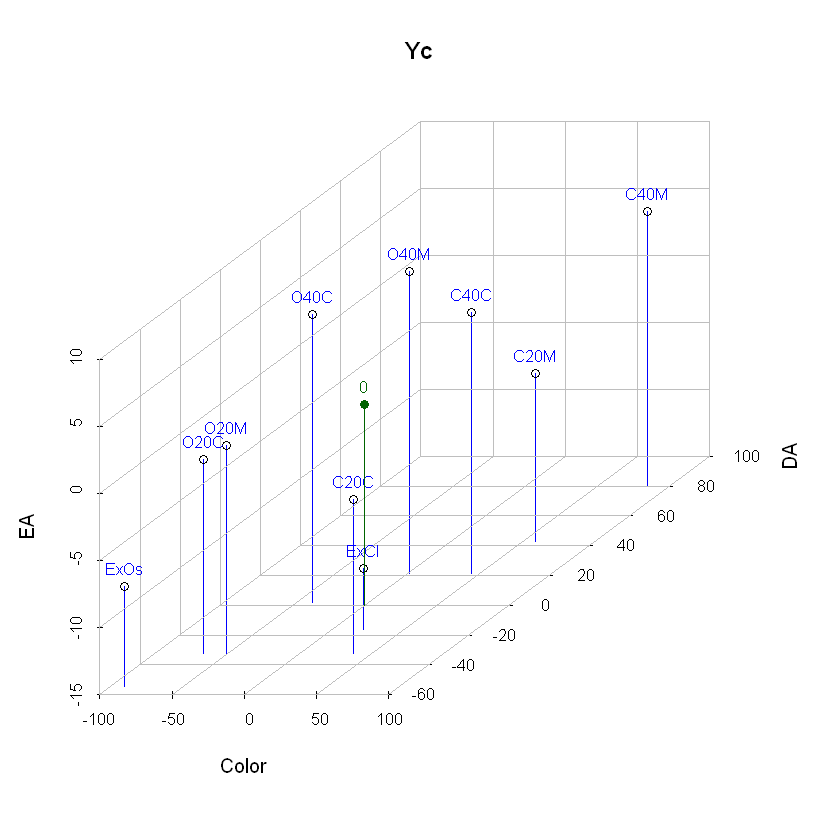

In [12]:
# grafica de datos centrados
Yc3D <- scatterplot3d(Yc , main ="Yc",type ="h",color =" blue ",box=FALSE , las =1)
Yc3D$points3d(Yc , pch =1)
addgrids3d(Yc , grid =c("xy","xz","yz"))
text( Yc3D$xyz.convert(Yc),labels = rownames (Yc),cex =0.8 , col=" blue ",pos =3)
Yc3D$points3d (t(c(0 ,0 ,0)),pch =19 , col=" darkgreen ",type ="h")
text( Yc3D $ xyz.convert(t(c(0 ,0 ,0))),labels ="0",pos =3, col=" darkgreen ",cex=0.8)

### Estandarizando y matriz de distancias

In [16]:
par(las =1)                        # para que las etiquetas de los dos ejes sean horizontales
V <-t(Yc)%*%as.matrix(Yc)/n; V     # V = var(Y)*(n -1)/n  Matriz de varianzas y covarianzas

,Color,DA,EA
Color,3105.810,1738.388,60.95
DA,1738.388,1560.188,129.36
EA,60.950,129.360,33.45


In [17]:
Dsigma<-diag(sqrt(diag(V)));Dsigma # Matriz de desviaciones estándar

55.72979,0.00000,0.000000
0.00000,39.49922,0.000000
0.00000,0.00000,5.783597


In [18]:
round(diag(Dsigma),1)              # Desviaciones estándar

[1] 55.7 39.5  5.8

In [19]:
X <-as.matrix(Yc)%*%solve(Dsigma)  # Matriz estandarizada (centrada y dividida en varianza)
colnames(X) <- colnames (Y);X

,Color,DA,EA
ExCl,0.38220130,-0.4065903,-1.81547903
C40M,1.51265585,2.0289008,0.95096521
C40C,0.79490693,0.5427955,0.77806244
C20M,1.04611905,1.0921735,-0.43225691
C20C,0.66930087,-0.8217884,-0.60515968
ExOs,-1.62749568,-1.3812931,-1.29677074
O40M,0.02332684,0.5427955,1.29677074
O40C,-0.69442208,0.0465832,1.12386797
O20M,-0.90974676,-0.8217884,0.08645138
O20C,-1.19684633,-0.8217884,-0.08645138


### Estandarizando y matriz de distancias

In [20]:
V <-t(X)%*%X/n;V          # calculo de matriz correlaciones

,Color,DA,EA
Color,1.0000000,0.7897157,0.1890986
DA,0.7897157,1.0000000,0.5662568
EA,0.1890986,0.5662568,1.0000000


In [21]:
des <-eigen (V);des       # calculo de valores y vectores propios

eigen() decomposition
$values
[1] 2.0670307 0.8216466 0.1113227

$vectors
          [,1]        [,2]       [,3]
[1,] 0.5794934 -0.57140813  0.5811025
[2,] 0.6728898 -0.06680772 -0.7367197
[3,] 0.4597898  0.81794222  0.3457801


In [22]:
lambda <-des$values
U <-des$vectors           # matriz con vectores propios en columnas
rownames(U) <- rownames(V)
colnames(U) <-c(" Eje1 "," Eje2 "," Eje3 "); round (U,3)

,Eje1,Eje2,Eje3
Color,0.579,-0.571,0.581
DA,0.673,-0.067,-0.737
EA,0.460,0.818,0.346


In [23]:
lambda ; U                # Matriz de valores y vectores propios

[1] 2.0670307 0.8216466 0.1113227

,Eje1,Eje2,Eje3
Color,0.5794934,-0.57140813,0.5811025
DA,0.6728898,-0.06680772,-0.7367197
EA,0.4597898,0.81794222,0.3457801


In [24]:
dist(Y)

          ExCl      C40M      C40C      C20M      C20C      ExOs      O40M
C40M 116.10099                                                            
C40C  46.47849  71.04006                                                  
C20M  70.26834  45.92385  26.75612                                        
C20C  23.95746 122.34688  54.93824  78.46885                              
ExOs 118.47046 221.21955 155.38661 178.24503 129.95542                    
O40M  46.15463 101.67935  43.10452  61.80526  65.74352 120.27053          
O40C  64.87997 145.81114  85.30627 105.80969  83.97910  77.98051  44.55513
O20M  74.65896 175.86574 109.29872 132.68519  88.09086  46.39407  75.22107
O20C  90.07197 188.45625 123.49579 146.09709 104.04326  33.36780  87.13903
          O40C      O20M
C40M                    
C40C                    
C20M                    
C20C                    
ExOs                    
O40M                    
O40C                    
O20M  36.83056          
O20C  44.82734  16.03122

En la figura de nuve de puntos aparecen las distancias entre los 10 cafés. Una distancia de cero indicará que los dos cafés tienen los mismos valores para las variables. En la gráfica, la pareja de cafés más alejados son ExOs y C40M, la distancia entre ellos es 221, la mayor en la tabla. Los más próximos con C20C y C20M, con una distancia de 16.

### Componentes Principales NORMADO (son proyecciones sobre los vectores propios.)

In [25]:
F <- X%*%U ;F                  # Componentes principales, coordenadas sobre los nuevos ejes

,Eje1,Eje2,Eje3
ExCl,-0.8868461,-1.67618651,-0.10611527
C40M,2.6790449,-0.22205551,-0.28689831
C40C,1.1836301,0.14593090,0.33107275
C20M,1.1423842,-1.02428774,-0.34618917
C20C,-0.4433639,-0.82252780,0.78510797
ExOs,-2.4688231,-0.03843822,-0.37651347
O40M,0.9750013,1.01109146,0.06206462
O40C,0.1456754,1.31294537,-0.04923801
O20M,-1.0404158,0.64545074,0.10666475
O20C,-1.2862871,0.66807730,-0.11995587


In [26]:
round ( sort(F[,1]) ,2)        # Ordenando el componente 1

ExOs  O20C  O20M  ExCl  C20C  O40C  O40M  C20M  C40C  C40M 
-2.47 -1.29 -1.04 -0.89 -0.44  0.15  0.98  1.14  1.18  2.68

In [27]:
round ( sort(F[,2]) ,2)        # Ordenando el componente 2

ExCl  C20M  C20C  C40M  ExOs  C40C  O20M  O20C  O40M  O40C 
-1.68 -1.02 -0.82 -0.22 -0.04  0.15  0.65  0.67  1.01  1.31

### Planos factoriales y ayudas para su interpretación

El primer plano factorial se construye buscando las coordenadas de los individuos sobre los ejes 1 y 2. El vector de todas las coordenadas sobre un eje s se nota $F_s$ y es: $F_s = XV_s$. La tabla de las coordenadas sobre los nuevos ejes es F = XU.

In [28]:
F <- X%*%U; round(F,2)        # coordenadas sobre los nuevos ejes

,Eje1,Eje2,Eje3
ExCl,-0.89,-1.68,-0.11
C40M,2.68,-0.22,-0.29
C40C,1.18,0.15,0.33
C20M,1.14,-1.02,-0.35
C20C,-0.44,-0.82,0.79
ExOs,-2.47,-0.04,-0.38
O40M,0.98,1.01,0.06
O40C,0.15,1.31,-0.05
O20M,-1.04,0.65,0.11
O20C,-1.29,0.67,-0.12


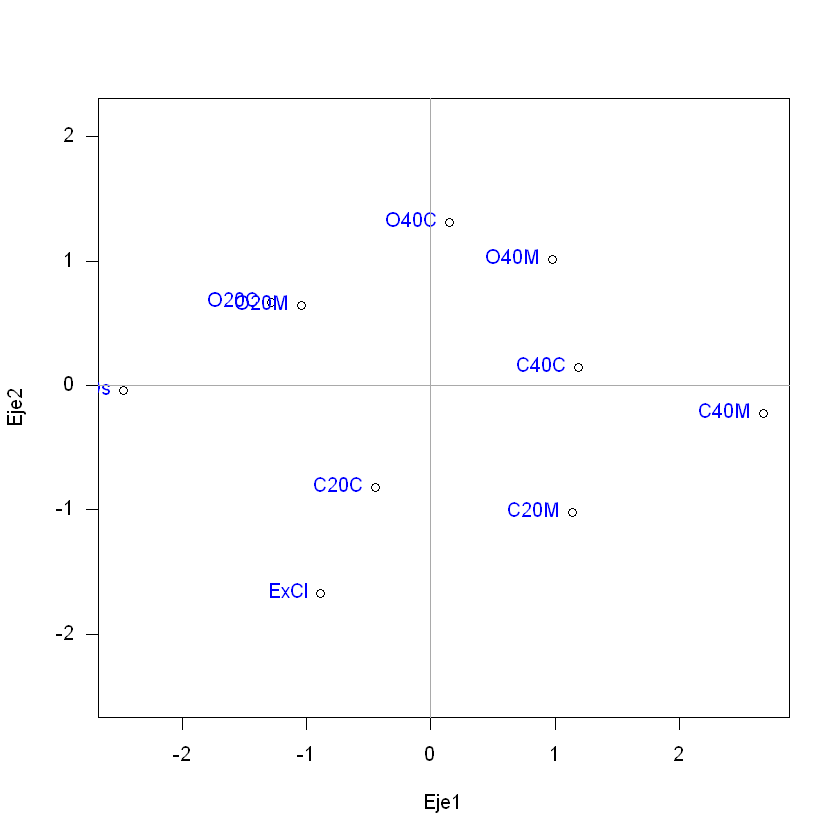

In [29]:
plot(F[,1:2],las =1, asp=1)   # plano 12
text(F[ ,1:2],label = rownames(F),col="blue ",pos=2) # etiquetas
abline(h=0,v=0, col=" darkgrey ") # ejes

La interpretación se hace teniendo en cuenta los vectores propios: al lado positivo del primer eje se sitúan los cafés con mayores valores en las tres variables, mientras que al lado positivo del segundo eje los de mayor valor en EA y al lado negativo los de mayor valor en Color.

#### Calidad de la representación o coseno cuadrado

In [30]:
d2<-rowSums(F^2);d2                   # distancias

ExCl     C40M     C40C     C20M     C20C     ExOs     O40M     O40C 
3.607358 7.308901 1.531885 2.474054 1.489518 6.238327 1.976785 1.747471 
    O20M     O20C 
1.510449 2.115251

In [31]:
cont<- 1/n*F^2%*%diag(1/lambda )*100  # contribuciones
cos2<- F^2/d2*100 
Ayudasinterp <-cbind ( dis2 =d2 ,F1=F[,1] , F2=F[,2], cont1 = cont [,1], cont2 = cont [,2], cos21 =
                cos2 [,1], cos22 = cos2 [,2], cosp = rowSums ( cos2 [ ,1:2]) )
round(Ayudasinterp  ,2) # ayudas en consola

,dis2,F1,F2,cont1,cont2,cos21,cos22,cosp
ExCl,3.61,-0.89,-1.68,3.80,34.19,21.80,77.89,99.69
C40M,7.31,2.68,-0.22,34.72,0.60,98.20,0.67,98.87
C40C,1.53,1.18,0.15,6.78,0.26,91.45,1.39,92.84
C20M,2.47,1.14,-1.02,6.31,12.77,52.75,42.41,95.16
C20C,1.49,-0.44,-0.82,0.95,8.23,13.20,45.42,58.62
ExOs,6.24,-2.47,-0.04,29.49,0.02,97.70,0.02,97.73
O40M,1.98,0.98,1.01,4.60,12.44,48.09,51.72,99.81
O40C,1.75,0.15,1.31,0.10,20.98,1.21,98.65,99.86
O20M,1.51,-1.04,0.65,5.24,5.07,71.67,27.58,99.25
O20C,2.12,-1.29,0.67,8.00,5.43,78.22,21.10,99.32


Un plano factorial es una aproximación de la nube de puntos y como tal tendrá puntos bien representados, pero podrá contener puntos con mala calidad de proyección. La calidad de la proyección o representación sobre un eje se mide con el coseno cuadrado que se define, para un punto, como el cuadrado de la relación entre la norma de la proyección sobre la norma en el espacio completo (distancia del punto al origen). El coseno cuadrado de la proyección de un punto sobre un plano es la suma de los cosenos cuadrados del punto sobre los ejes que conforman el plano.

En la columna d2 se observan las distancias al origen en el espacio completo R3, en la nuve de puntos en 3d, el más cercano esC20C y el más alejado C40M. Las coordenadas son las usadas para la gráfica. El café que más contribuye a la varianza del primer eje es C40M. En el plano están bien representados los 10 cafés; en el primer eje el O40C está mal representado.

iMPORTANTE EN CUANTO A LOS COSENOS CUADRADOS: Calidad de la proyecciÓn sobre un eje s: cociente al cuadrado entre Fs(i) y d(i; 0). Cuando se acerca a 1, la longitud de la proyecciÓn se aproxima a la distancia original; si se acerca a cero, la proyecciÓn conserva muy poco de la distancia original.

### Individuos ilustrativos o suplementarios

En el ejemplo de Café, se prepararon tazas con dos cafés comerciales y se le hicieron las mismas mediciones de las tazas originadas en el diseño experimental. La posiciÓn de los dos cafés comerciales permite ver su relación con los del diseño experimental (ver siguiente grafica)

In [32]:
comer <-as.matrix( cafe[11:12 ,1:3]) ; comer  # Datos de variables nuevas

,Color,DA,EA
Com1,221,413.3,27
Com2,264,400.9,23


In [33]:
comc <-comer - rep(1 ,2)%*%t(g); comc         # centrado

,Color,DA,EA
Com1,-55.7,12.14,-8.5
Com2,-12.7,-0.26,-12.5


In [34]:
comcr <- comc%*%solve( Dsigma )               # reducido (normada)
colnames(comcr) <- colnames(comer); comcr

,Color,DA,EA
Com1,-0.9994654,0.307347839,-1.469674
Com2,-0.2278853,-0.006582408,-2.161285


In [35]:
Fsup <- comcr%*%U; Fsup                       # Componentes

,Eje1,Eje2,Eje3
Com1,-1.048113,-0.6515386,-1.3154049
Com2,-1.130224,-1.6371506,-0.8749045


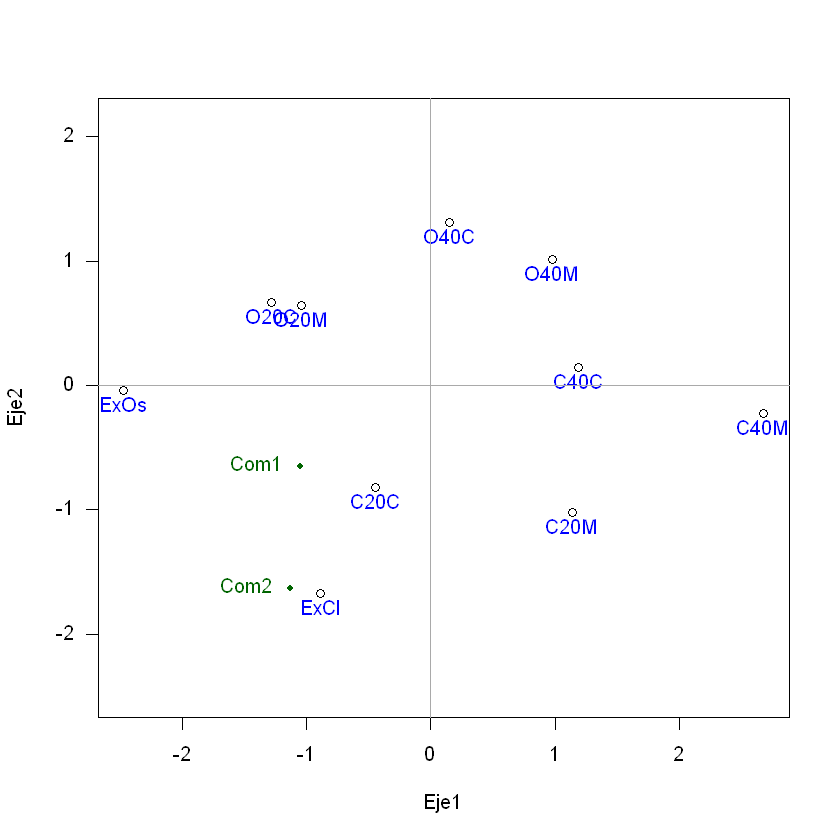

In [36]:
# primer plano factorial
plot(F[ ,1:2] , las =1, asp =1)
text(F[ ,1:2] , label = rownames (F),col=" blue ",pos =1)
abline(h=0,v=0, col=" darkgrey ")
points(Fsup ,col =" darkgreen ",pch =20)      # cafes comerciales
text(Fsup , labels =c(" Com1 "," Com2 "),col=" darkgreen ",pos =2)

El comercial 2 se situó muy cerca del cafÉ excelso claro y el comercial 1 entre los cafÉs excelsos y los que tienen menos agregados de granos. Con esto se pueden describir los cafés comerciales como de buena calidad. Su proyecciÓn se hace realizando sobre sus vectores las mismas transformaciones que para los cafés activos: centrado y reducido utilizando la media y varianza de los cafés activos y proyección.

### Variables cualitativas ilustrativas

,Eje1,Eje2,Eje3
ceba,-0.1000864,0.32610644,0.2367467
exce,-2.4688231,-0.03843822,-0.3765135
maiz,1.5988101,-0.07841726,-0.1903410
maiz,-1.0404158,0.64545074,0.1066648
exce,-0.8868461,-1.67618651,-0.1061153


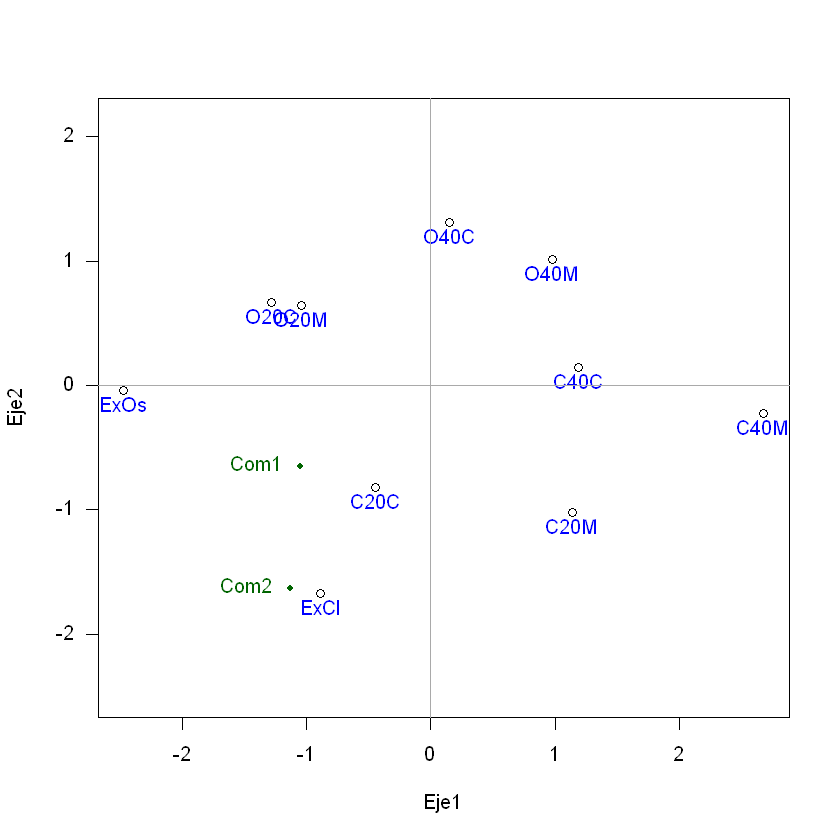

In [37]:
#codigo anterior
plot(F[ ,1:2] , las =1, asp =1)
text(F[ ,1:2] , label = rownames (F),col=" blue ",pos =1)
abline(h=0,v=0, col=" darkgrey ")
points(Fsup ,col =" darkgreen ",pch =20)      # cafes comerciales
text(Fsup , labels =c(" Com1 "," Com2 "),col=" darkgreen ",pos =2)

#nuevo codigo para variables categoricas
conta <- factor(c("exce "," maiz "," ceba "," maiz "," ceba "," exce "," maiz "," ceba ", "
maiz "," ceba "))
Fconta <-centroids(F,conta)$centroids; Fconta


In [38]:
# dev. print ( device = xfig )

Primer plano factorial del ACP del ejemplo Café, mostrando dos cafés comerciales y las categorís del tipo de contaminante. Los cafés comerciales se ponen en el marco de referencia del experimento, su posición permite decir que son de buena calidad (están cerca de los cafés no contaminados). La posiciones de los centros de gravedad: excelso, cebada y maiz, muestran que el maíz afecta más la calidad del café.

### Círculo de correlaciones y ayudas a la interpretación

Un plano factorial de las variables estandarizadas se denomina círculo de correlaciones (siguiente gráfica), ya que es la proyección de la hiperesfera de correlaciones, flechas que parten del origen y tienen longitud 1.

In [39]:
G <-U%*%diag(sqrt(lambda));G        # G <- cor(Y,F)

Color,0.8331476,-0.51795132,0.1938852
DA,0.9674253,-0.06055768,-0.2458070
EA,0.6610477,0.74142147,0.1153697


In [40]:
correlaciones<- cor(Y,Y);correlaciones

,Color,DA,EA
Color,1.0000000,0.7897157,0.1890986
DA,0.7897157,1.0000000,0.5662568
EA,0.1890986,0.5662568,1.0000000


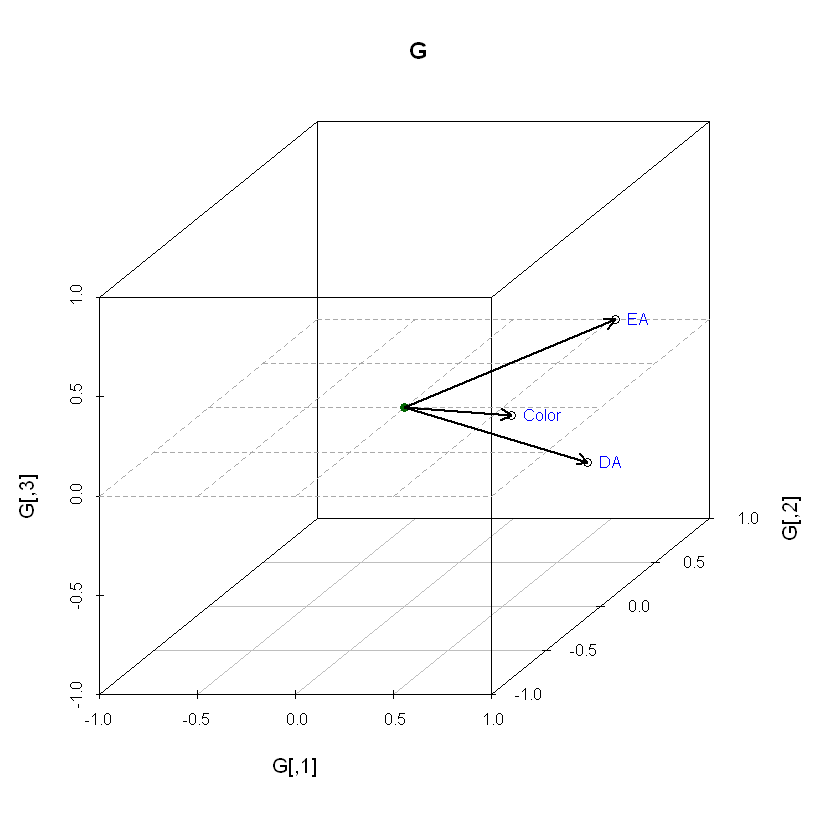

In [41]:
G3D<-scatterplot3d(G,main ="G",xlim =c(-1 ,1),ylim =c(-1 ,1),zlim =c(-1,1))
coord <- G3D$xyz.convert(G)
text (coord , labels = rownames (G), cex =0.8 , col=" blue ",pos =4)
G3D $ plane (0 ,0 ,0 , col =" darkgrey ")
G3D $ points3d (t(c(0 ,0 ,0)),pch =19 , col =" darkgreen ")
cero <- G3D$xyz.convert(0, 0, 0)
for (eje in 1:3) {
  arrows ( cero$x, cero$y, coord$x[eje], coord$y[eje], lwd = 2, length = 0.1)
}

In [42]:
#dev.print(device=xfig ,file ="cafeEspera.fig ") # grabar grafica en xfig
#dev.copy2pdf(file="C:/Users/YULY/Desktop/cafeEspera.pdf") 

El primer eje es un “factor tamaño” porque está correlacionado positivamente con las tres variables. Los cafés con valores altos de sus coordenadas sobre el eje tienen valores altos en las tres variables.

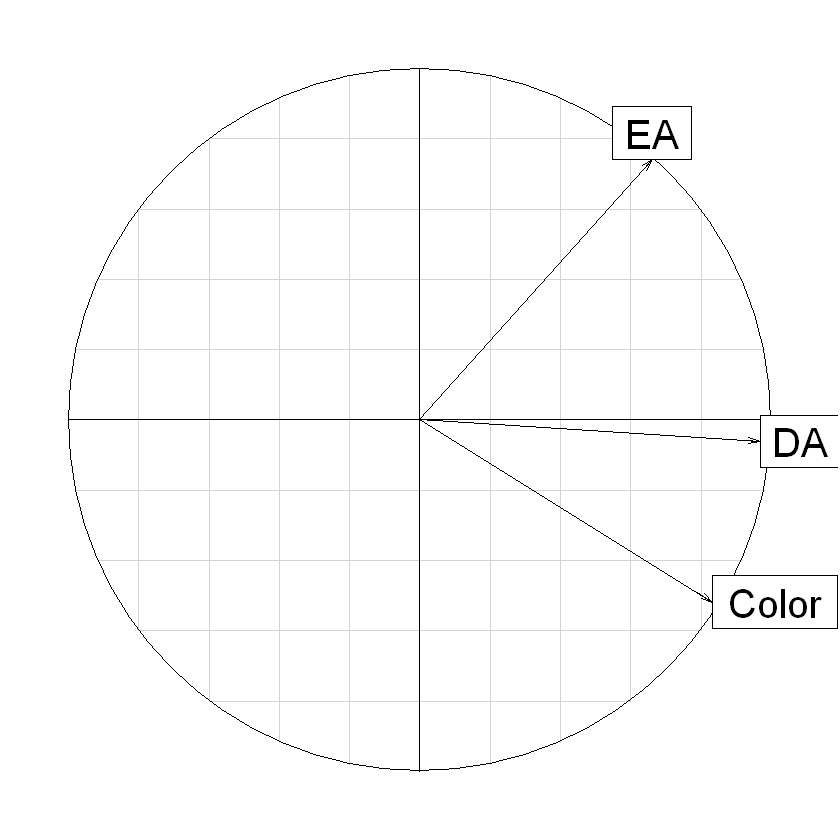

In [43]:
s.corcircle(G, clabel =2)

### proyeccion de nota como variable ilustrativa

Conociendo que el círculo es una imagen de la matriz de correlaciones y permite la interpretación de los ejes factoriales, se tiene que la correlación negativa de la Nota de apreciación de los catadores con el primer eje significa que los mejores cafés están al lado negativo del primer eje, es decir que valores mayores de las tres variables dañan la calidad apreciada del café.

El segundo eje muestra una correlación positiva con EA y negativa con Color, los cafés con coordenadas positivas tienen mayores valores de extracto acuoso y los de coordenadas negativas mayores valores de color.

In [44]:
correlaciones<- cor(Y,Y);correlaciones

,Color,DA,EA
Color,1.0000000,0.7897157,0.1890986
DA,0.7897157,1.0000000,0.5662568
EA,0.1890986,0.5662568,1.0000000


[1] 7.46 6.24 6.12 6.04 6.22 7.40 5.90 6.94 6.90 7.16

Eje1,Eje2,Eje3
-0.7887268,-0.05268367,-0.3437051


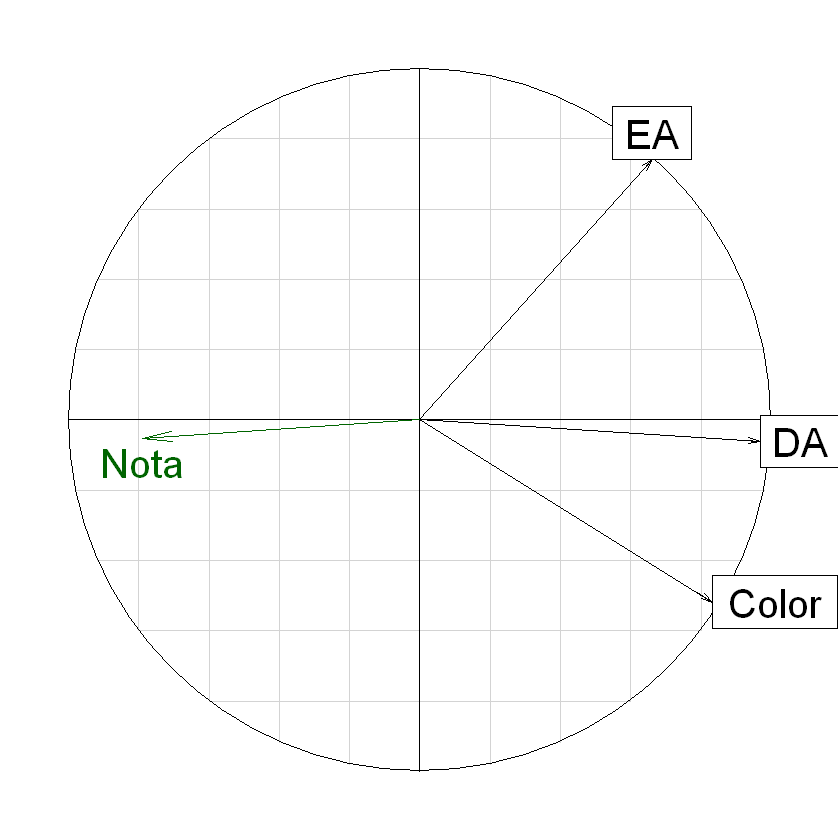

In [51]:
s.corcircle(G, clabel =2)
Nota <- cafe [1:10 ,16]; Nota
Fnota <- cor(Nota ,F); Fnota
arrows(0 ,0, Fnota [1] , Fnota [2] , col=" darkgreen",angle =10)
text(Fnota ," Nota ",col=" darkgreen ", pos =1, cex =2)

In [ ]:
#dev.copy2pdf(file="C:/Users/OSCAR/Desktop/circulocorrelaciones.pdf") 

En el ejemplo Café se proyecta la nota de impresión global dada por un panel de catadores, para explorar su relación con las tres variables físicas en conjunto. La correlación con el primer eje es alta y en sentido opuesto (-0.79), lo que significa que valores altos en estas tres propiedades físicas indican detrimento de la calidad apreciada de las tazas de café. Esto explica la ubicación de los cafés excelso del lado negativo del eje 1.

---

### Usando libreria FACTOCLASS

In [55]:
library ( FactoClass )         # carga de paquetes
data ( cafe )                  # hacer los datos disponibles
acp <-dudi.pca(cafe [1:10 ,1:3] , scannf = FALSE ) # ACP normado con variables fisicas y reteniendo dos ejes

acp$cent                       # medias de las variables :

Color     DA     EA 
276.70 401.16  35.50

In [56]:
round(acp$norm ,2)             # desviacion estandar de las variables

Color    DA    EA 
55.73 39.50  5.78

In [57]:
inertia(acp)                   # valores propios y porcentajes

Inertia information:
Call: inertia.dudi(x = acp)

Decomposition of total inertia:
    inertia     cum  cum(%)
Ax1  2.0670   2.067   68.90
Ax2  0.8216   2.889   96.29
Ax3  0.1113   3.000  100.00

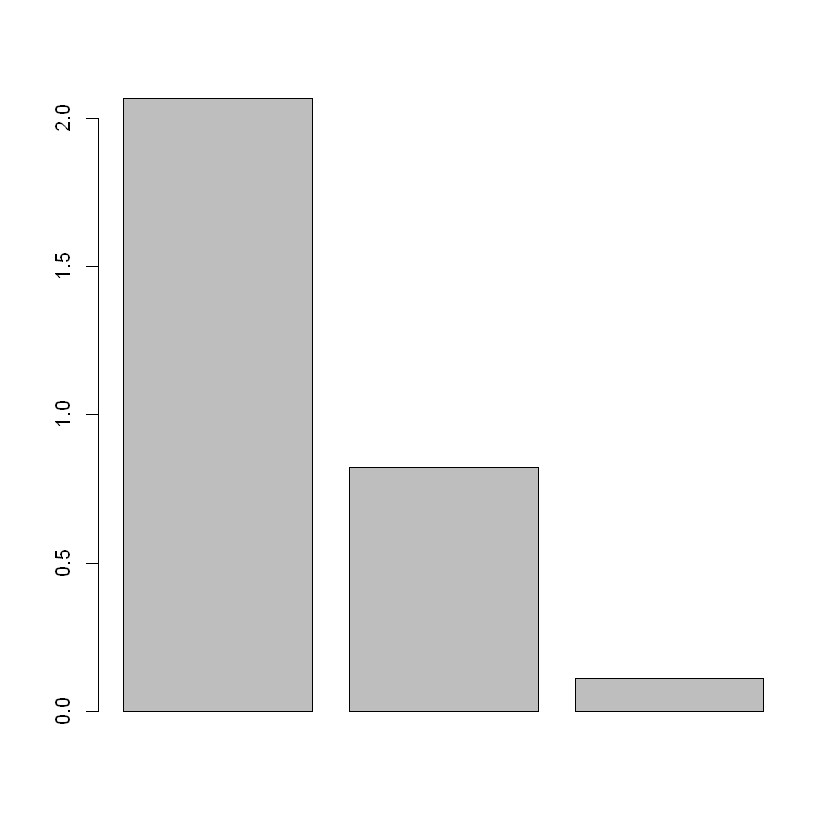

In [58]:
barplot(acp$eig )              # histograma de valores propios

In [59]:
round(acp$c1 ,3)               # vectores propios

,CS1,CS2
Color,0.579,-0.571
DA,0.673,-0.067
EA,0.460,0.818


Axis1,Axis2
-0.7887268,-0.05268367


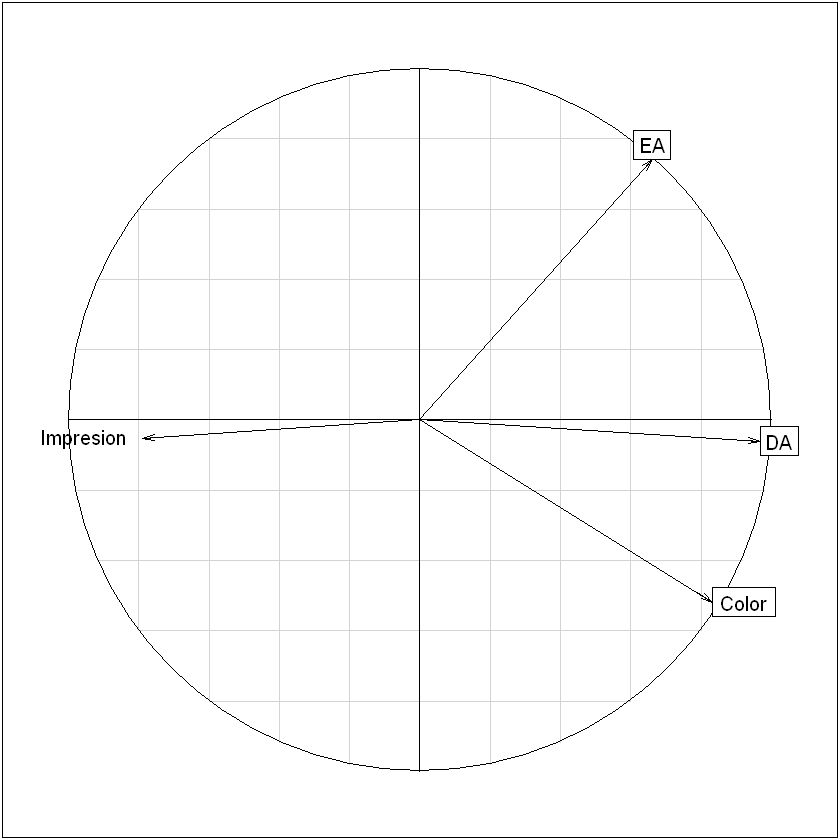

In [62]:
s.corcircle(acp$co)            # circulo de correlaciones


# proyeccion de la variable Impresion como ilustrativa
(cor( cafe [1:10 ,16] , acp$li) -> coimpre )
s.arrow ( coimpre , label =" Impresion ",add.plot = TRUE , boxes = FALSE )

In [63]:
round(acp$co ,3)               # coordenadas de las variables = correlaciones con los ejes

,Comp1,Comp2
Color,0.833,-0.518
DA,0.967,-0.061
EA,0.661,0.741


In [64]:
inertia (acp ,, TRUE )         # ayudas para la interpretacion de las variables

Inertia information:
Call: inertia.dudi(x = acp, col.inertia = TRUE)

Decomposition of total inertia:
    inertia     cum  cum(%)
Ax1  2.0670   2.067   68.90
Ax2  0.8216   2.889   96.29
Ax3  0.1113   3.000  100.00

Column contributions (%):
  Color      DA      EA 
  33.33   33.33   33.33 

Column absolute contributions (%):
        Axis1   Axis2
Color   33.58 32.6507
DA      45.28  0.4463
EA      21.14 66.9029

Signed column relative contributions:
        Axis1    Axis2
Color   69.41 -26.8274
DA      93.59  -0.3667
EA      43.70  54.9706

Cumulative sum of column relative contributions (%):
        Axis1 Axis1:2 Axis3:3
Color   69.41   96.24   3.759
DA      93.59   93.96   6.042
EA      43.70   98.67   1.331

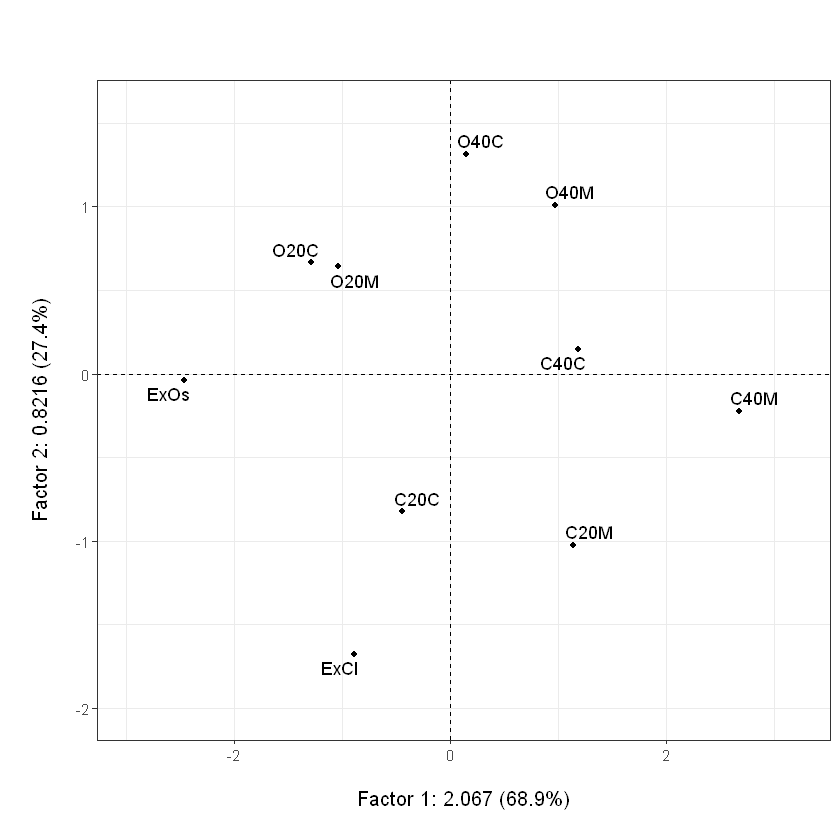

In [65]:
plot (acp , Tcol =FALSE ,gg= TRUE )

In [66]:
round (acp$li ,2)              # coordenadas de los cafes

,Axis1,Axis2
ExCl,-0.89,-1.68
C40M,2.68,-0.22
C40C,1.18,0.15
C20M,1.14,-1.02
C20C,-0.44,-0.82
ExOs,-2.47,-0.04
O40M,0.98,1.01
O40C,0.15,1.31
O20M,-1.04,0.65
O20C,-1.29,0.67


In [67]:
inertia (acp , TRUE )          # Resume todo

Inertia information:
Call: inertia.dudi(x = acp, row.inertia = TRUE)

Decomposition of total inertia:
    inertia     cum  cum(%)
Ax1  2.0670   2.067   68.90
Ax2  0.8216   2.889   96.29
Ax3  0.1113   3.000  100.00

Row contributions (%):
   ExCl    C40M    C40C    C20M    C20C    ExOs    O40M    O40C    O20M    O20C 
 12.025  24.363   5.106   8.247   4.965  20.794   6.589   5.825   5.035   7.051 

Row absolute contributions (%):
       Axis1    Axis2
ExCl  3.8050 34.19476
C40M 34.7227  0.60012
C40C  6.7777  0.25918
C20M  6.3136 12.76906
C20C  0.9510  8.23410
ExOs 29.4872  0.01798
O40M  4.5990 12.44216
O40C  0.1027 20.98013
O20M  5.2368  5.07039
O20C  8.0044  5.43211

Signed row relative contributions:
       Axis1     Axis2
ExCl -21.803 -77.88530
C40M  98.199  -0.67464
C40C  91.455   1.39017
C20M  52.749 -42.40673
C20C -13.197 -45.42087
ExOs -97.704  -0.02368
O40M  48.090  51.71557
O40C   1.214  98.64686
O20M -71.665  27.58164
O20C -78.219  21.10044

Cumulative sum of row relative cont

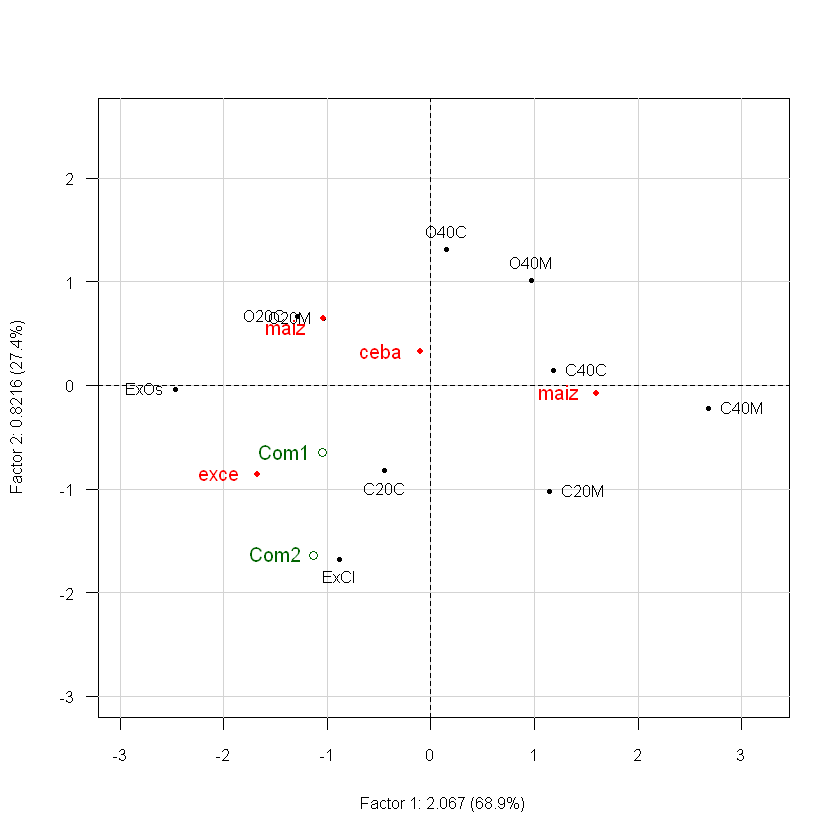

In [68]:
suprow(acp , cafe [11:12 ,1:3]) $ lisup -> lcom

plot(acp , Tcol = FALSE )      #Gráfico interesante
points(lcom ,col =" darkgreen ")#Colocando nuevas variables (exogenas)
text(lcom , rownames ( lcom ),col=" darkgreen ",pos =2)

# proyeccion variables conta ( contaminacion ) como ilustrativa
conta <- factor(c(" exce "," maiz "," ceba "," maiz "," ceba "," exce "," maiz "," ceba ","
maiz "," ceba "))
supqual(acp , conta ) -> supconta
points( supconta $coor , col=" red",pch =20)
text( supconta $coor , rownames ( supconta $ coor ),col=" red",pos =2)

In [69]:
# valores test de categorias de conta como ilustrativa
round( supconta$tv ,2)

,Axis1,Axis2
ceba,-0.17,0.88
exce,-1.75,-1.42
maiz,2.18,-0.17
maiz,-0.72,0.71


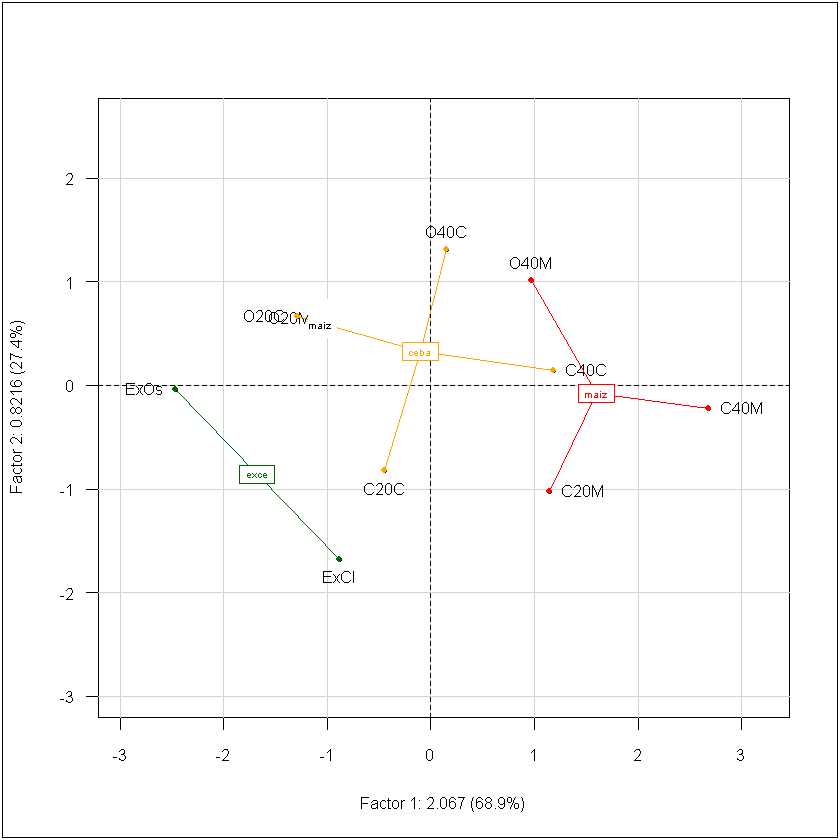

In [70]:
plot (acp , Tcol = FALSE )
s.class(acp$li ,conta ,col=c(" orange "," darkgreen ","red"),add.plot = TRUE ,
          cellipse = 0, clabel =0.5)